##### First We will Import all the necessary libraries

In [109]:
import pandas as pd
import numpy as np
import missingno as mnp
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from fancyimpute import KNN
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

#### Importing the Dataset and saving it in a DataFrame

In [110]:
diab = pd.read_csv('health care diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
diab.shape   #checking its shape

(768, 9)

#### Checking the Data Types 

In [112]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [113]:
diab.isna().sum()   #checking for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### As we can see, there are no null values. But there are some values which is creating a problem for us.
- As we know, Glucose can not be zero or the person will die. The same applies for BloodPressure, SkinThickness, Insulin and BMI
- We will have to treat these zeros as Null Values

In [114]:
#creating a list which contains the list of Columns which needs to be treated
treatnull = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diab[treatnull].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


In [115]:
#printing the number of zeroes in each column
for col in treatnull:
        print(f'No of zeroes in {col} : {diab[diab[col]==0].value_counts().sum()}')

No of zeroes in Glucose : 5
No of zeroes in BloodPressure : 35
No of zeroes in SkinThickness : 227
No of zeroes in Insulin : 374
No of zeroes in BMI : 11


### Replacing zero with null values
- now we will replace zero with null values, we can directly replace them with the substitue value but this way,we will be able to properly choose the right method for value replacement without skewing the result.

In [116]:
diab[treatnull] = diab[treatnull].replace([0],np.nan)

In [117]:
#checking if there are still zeroes left
for col in treatnull:
        print(f'No of zeroes in {col} : {diab[diab[col]==0].value_counts().sum()}')

No of zeroes in Glucose : 0
No of zeroes in BloodPressure : 0
No of zeroes in SkinThickness : 0
No of zeroes in Insulin : 0
No of zeroes in BMI : 0


In [118]:
#checking the number of null values in each column
for col in treatnull:
         print(f'No of null values in {col} : {diab[col].isna().sum()}')

No of null values in Glucose : 5
No of null values in BloodPressure : 35
No of null values in SkinThickness : 227
No of null values in Insulin : 374
No of null values in BMI : 11


### Plotting the bar graph for Missing Values

<AxesSubplot:>

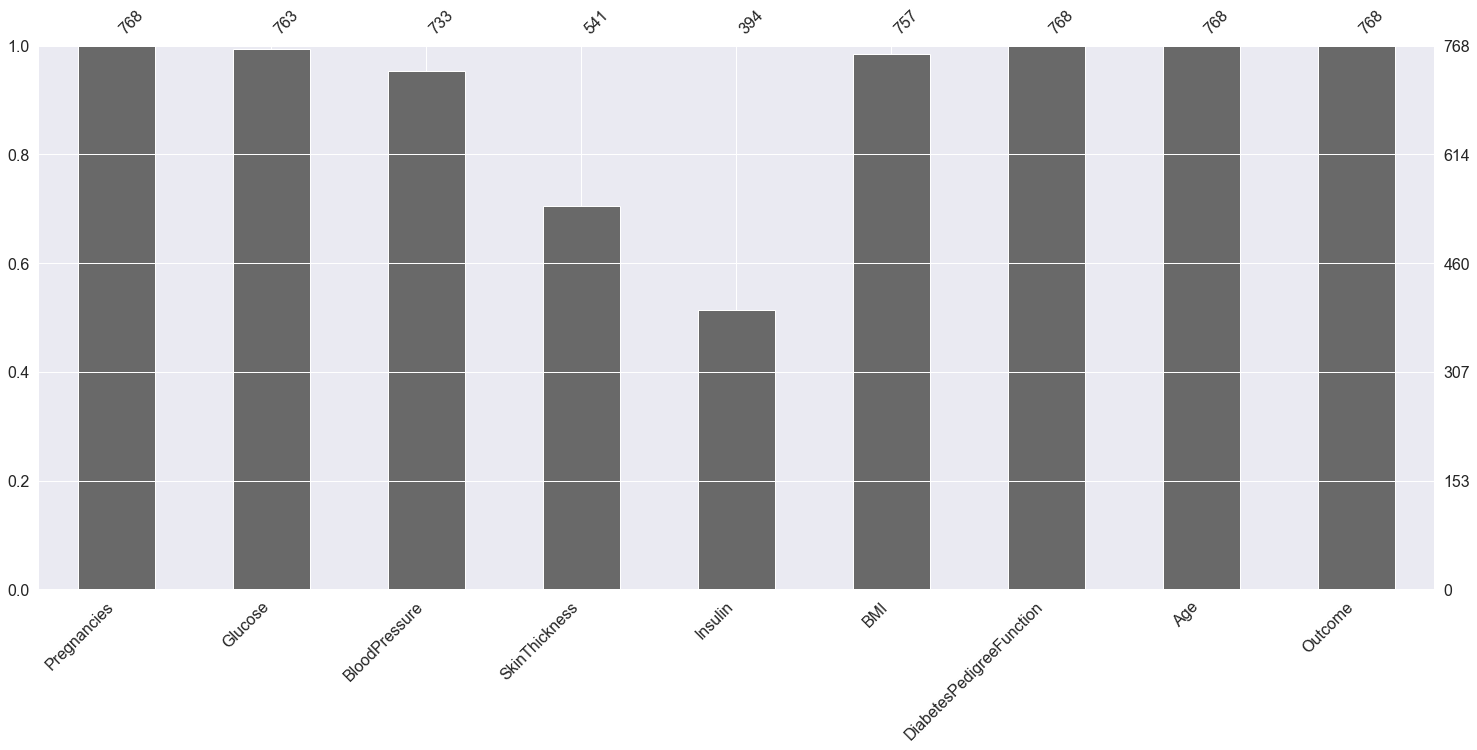

In [119]:
mnp.bar(diab)

### Plotting histogram to choose the correct way of replacing the values

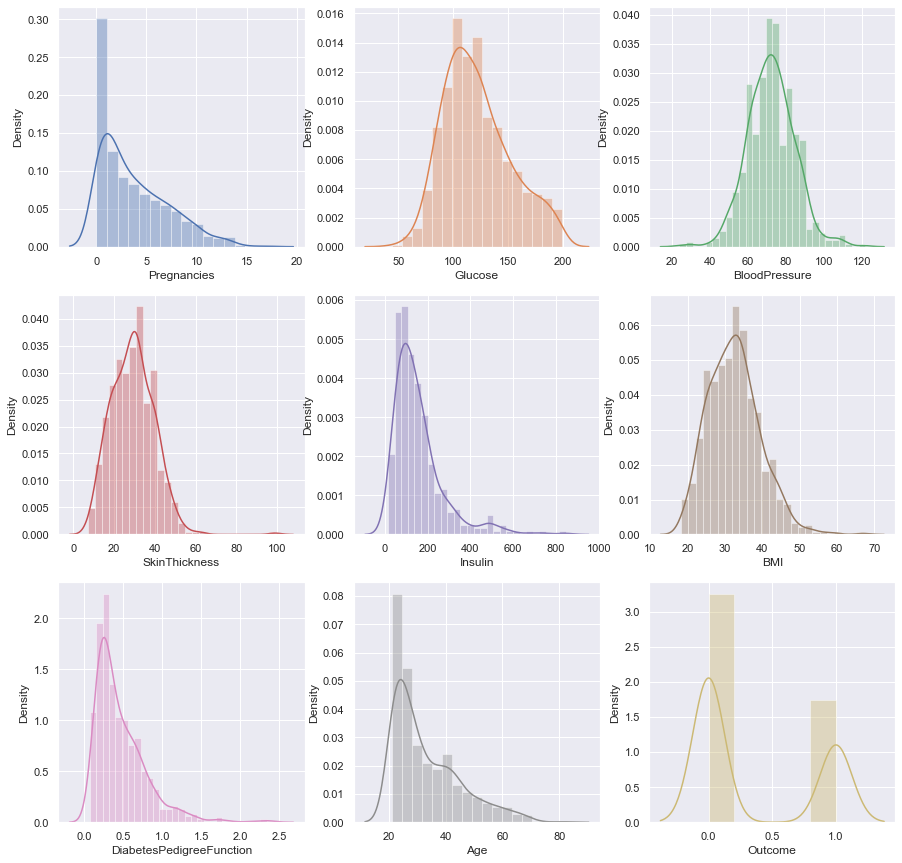

In [120]:
# Define the number of rows and columns you want
sns.set(rc = {'figure.figsize':(15,15)})
n_rows=3
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

for i, column in enumerate(diab.columns):
    sns.distplot(diab[column],ax=axes[i//n_cols,i%n_cols],color = next(color_cycle))

### Its clearly visible that some of the columns are skewed and some are not. So rather than analysing each and evry column indivisually, we can apply KNN imputer to fill all the Null values.

In [121]:
#checking the percentage of missing values in each column to decide what to do, whether to drop the rows or fill it

diab.isna().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

### Now we will normalise the data so that we can impute them with a bias as the result can be biased if we dont normalise the data.
- We will use standard scaler for normalising the data

In [122]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [123]:
col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
diab_knn = diab.copy(deep=True)         #creating a copy of the original dataset
SS.fit(diab_knn[col])                   #fitting the model 
diab_knn[col] = SS.transform(diab_knn[col])
diab_knn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995,1
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672,0
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584,1
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549,0
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496,1


### Imputing the null values using KNN Imputer

In [124]:
knn_imputer = KNN()
diab_knn.iloc[:,:] = knn_imputer.fit_transform(diab_knn)

Imputing row 1/768 with 1 missing, elapsed time: 0.094
Imputing row 101/768 with 2 missing, elapsed time: 0.096
Imputing row 201/768 with 1 missing, elapsed time: 0.097
Imputing row 301/768 with 3 missing, elapsed time: 0.099
Imputing row 401/768 with 2 missing, elapsed time: 0.100
Imputing row 501/768 with 0 missing, elapsed time: 0.101
Imputing row 601/768 with 1 missing, elapsed time: 0.103
Imputing row 701/768 with 0 missing, elapsed time: 0.104
Imputing row 1/768 with 1 missing, elapsed time: 0.063
Imputing row 101/768 with 2 missing, elapsed time: 0.064
Imputing row 201/768 with 1 missing, elapsed time: 0.066
Imputing row 301/768 with 3 missing, elapsed time: 0.067
Imputing row 401/768 with 2 missing, elapsed time: 0.069
Imputing row 501/768 with 0 missing, elapsed time: 0.070
Imputing row 601/768 with 1 missing, elapsed time: 0.071
Imputing row 701/768 with 0 missing, elapsed time: 0.073


In [125]:
diab_knn.isna().sum()    #checking for any null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [126]:
#printing number of zeroes 
for col in treatnull:
        print(f'No of zeroes in {col} : {diab_knn[diab_knn[col]==0].value_counts().sum()}')

No of zeroes in Glucose : 0
No of zeroes in BloodPressure : 0
No of zeroes in SkinThickness : 0
No of zeroes in Insulin : 0
No of zeroes in BMI : 0


#### Now we will plot the histogram again to see if there are any dramatic changes

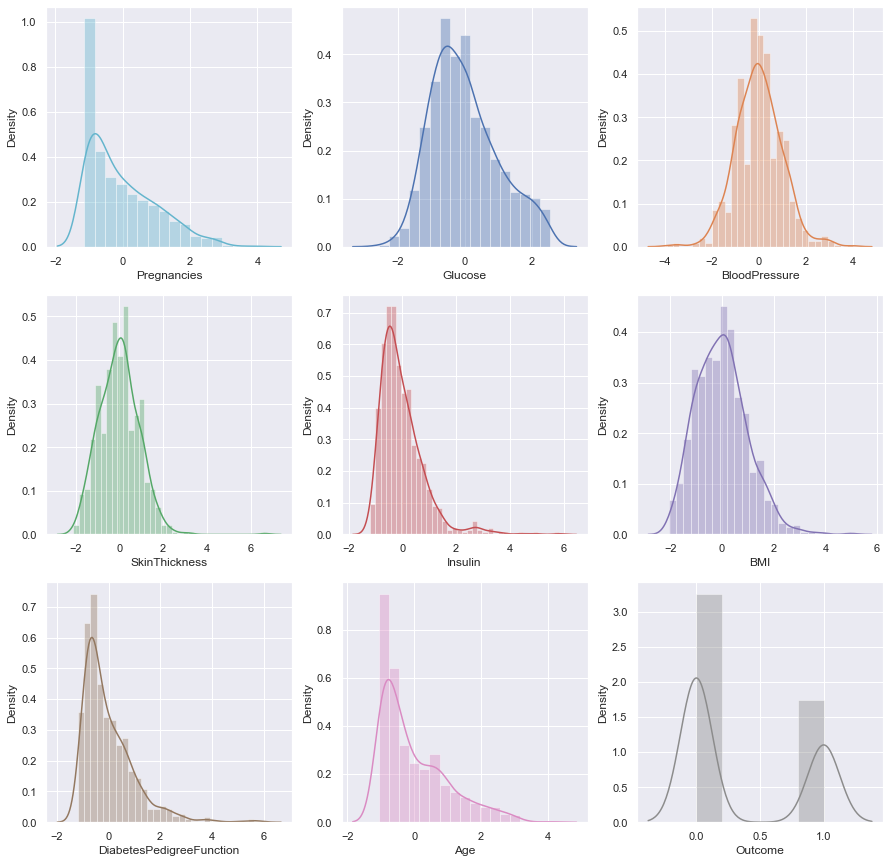

In [127]:
# Define the number of rows and columns you want
sns.set(rc = {'figure.figsize':(15,15)})
n_rows=3
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

for i, column in enumerate(diab_knn.columns):
    sns.distplot(diab_knn[column],ax=axes[i//n_cols,i%n_cols],color = next(color_cycle))

### now we will check the data types of all the columns and see if any changed

In [128]:
diab_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


#### we can see that the data types of some columns have changed, we will change them back to original

In [129]:
intcol = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age','Outcome']
diab_knn[intcol] = diab_knn[intcol].astype(int)

In [22]:
#rechecking if they are correct not or now
diab_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Creating a Count Plot for DataTypes

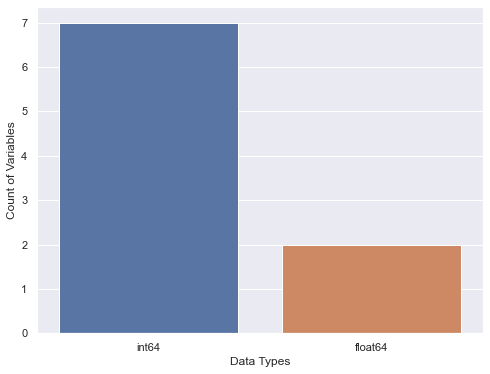

In [23]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.countplot(diab_knn.dtypes.map(str))
plt.xlabel('Data Types')
plt.ylabel('Count of Variables')
plt.show()

### Creating a Count Plot for the Target Variable i.e 'Outcome'
- We will check if we need to apply any technique to balance the data

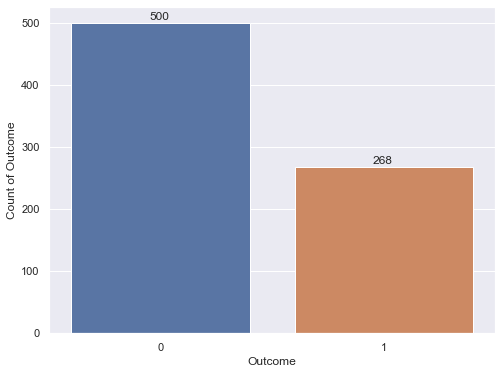

In [24]:
sns.set(rc = {'figure.figsize':(8,6)})
ax = sns.countplot(diab_knn.Outcome)
plt.xlabel('Outcome')
plt.ylabel('Count of Outcome')
for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+5))     #printing the Number as well

## Since the distribution is 3:1, the data is imbalanced. We will either use, undersampling or SMOTE to make it balanced again.

## Plotting Pairplot to Understand the relationship between 2 variables with respect to the Outcome Variable

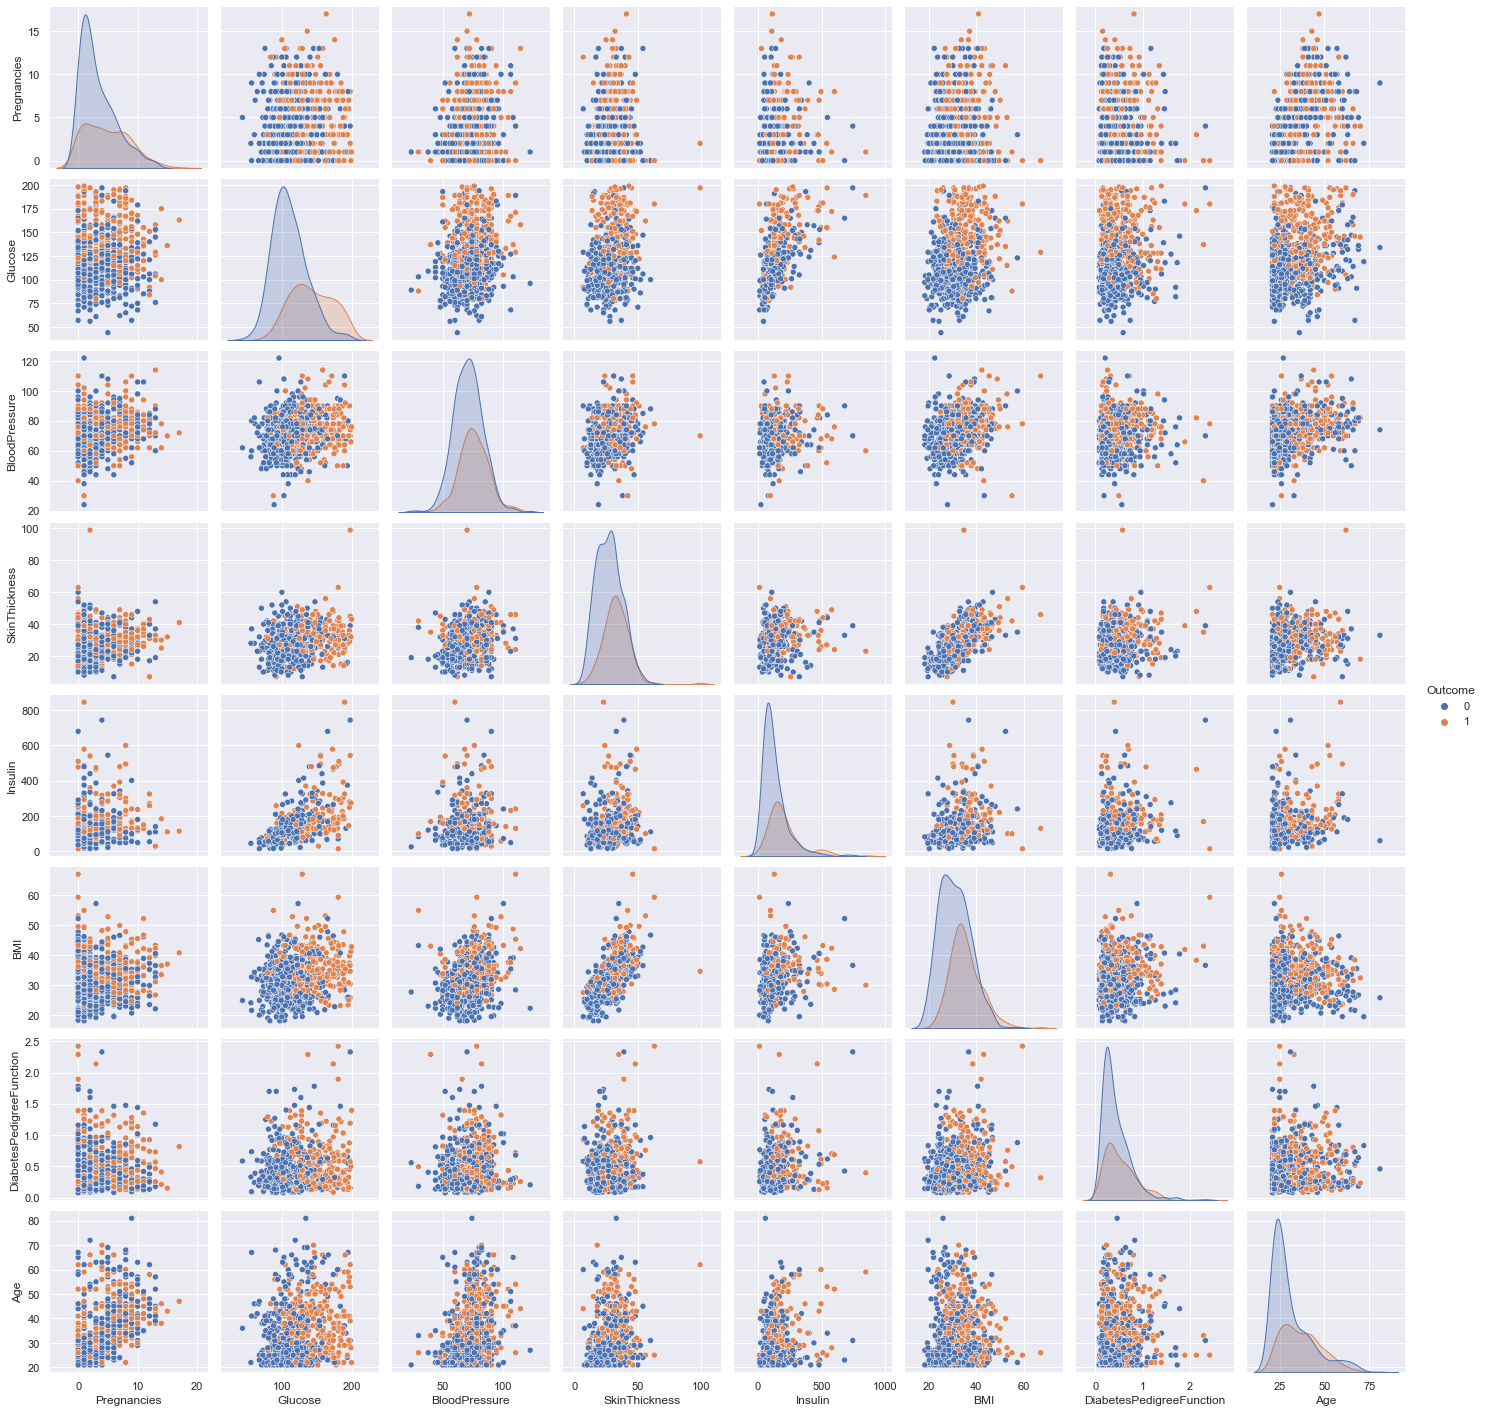

In [25]:
sns.pairplot(diab,hue = 'Outcome')

## Plotting a heatmap to check the Correlation of all the variables

<AxesSubplot:>

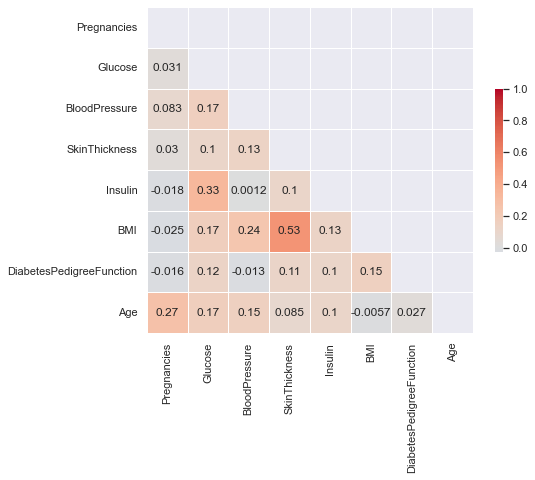

In [26]:
corr = diab_knn.drop('Outcome',axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(290, 40, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap = 'coolwarm' , vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

## To Devise strategies for model building. It is important to decide the right validation framework.
- We will apply the classification algorithms as the outcome is a categorical variable.
- We will start with the Logistic Regression and compare its performance with other algorithms.
- The algorothm with the best accuracy and performance will be used.
- We will use- Logistic Regression, Decision Tree, Random Forest,SVM and KNN.


### First we will check the most important feature using RandomForest Clasifier

In [27]:
from sklearn.model_selection import train_test_split
x = diab_knn.drop('Outcome',axis = 1)
y = diab_knn["Outcome"]

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.15,random_state=10)

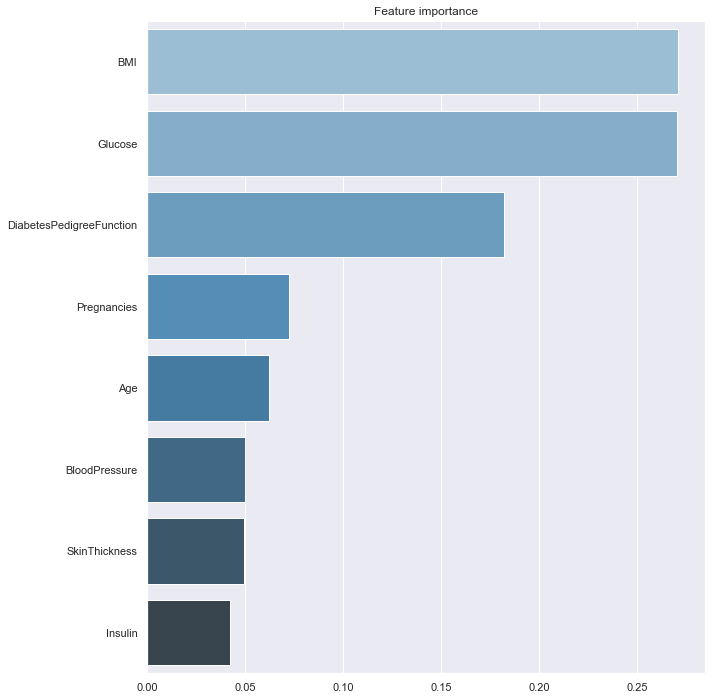

In [28]:
from sklearn.ensemble import RandomForestClassifier
params={'random_state':0,'n_jobs':-1,'n_estimators':500,'max_depth':8}

clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

### As we can see, Glucose and BMI are the most important feature, so we will look at them more closely.

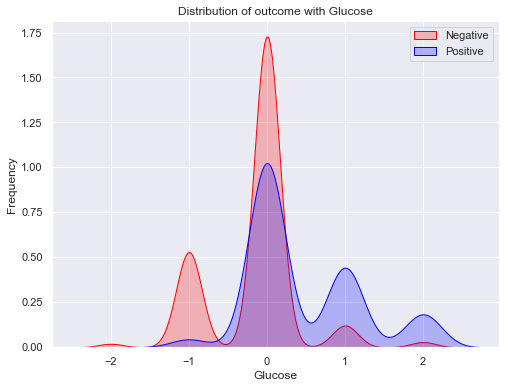

In [29]:
g = sns.kdeplot(diab_knn.Glucose[(diab_knn["Outcome"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(diab_knn.Glucose[(diab_knn["Outcome"] == 1) ], ax =g, color="Blue", shade= True)

g.set_xlabel("Glucose")
g.set_ylabel("Frequency")

plt.title('Distribution of outcome with Glucose')

g = g.legend(["Negative","Positive"])

#### This graph clearly shows us that, the higher the Glucose value, the more chances are of the person to be diabetic.

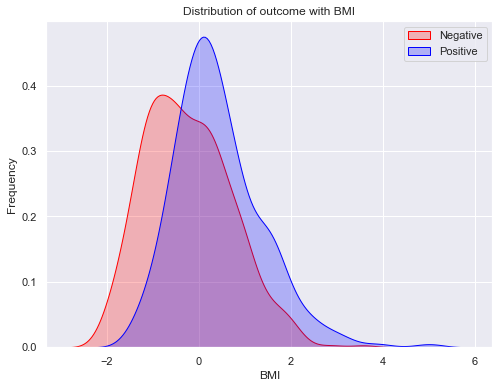

In [30]:
g = sns.kdeplot(diab_knn.BMI[(diab_knn["Outcome"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(diab_knn.BMI[(diab_knn["Outcome"] == 1) ], ax =g, color="Blue", shade= True)

g.set_xlabel("BMI")
g.set_ylabel("Frequency")

plt.title('Distribution of outcome with BMI')

g = g.legend(["Negative","Positive"])

#### This graph clearly shows that higher the BMI, higher are the chances are of a positive result

#### We will Save all the accuracy matrices in a seperate dataset to visualise it later for comparison.

In [31]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

### We will import all the accuracy metrics we will use

In [32]:
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score, precision_recall_curve

## Now we will start applying the models and see how they perform

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [34]:
lr.fit(x,y)

LogisticRegression()

In [35]:
lr.score(xtrain,ytrain)    #accuracy score on training Data

0.7576687116564417

In [36]:
lr.score(xtest,ytest)      #accuracy score on test data

0.8103448275862069

### now we will check the ROC curve

AUC: 0.875


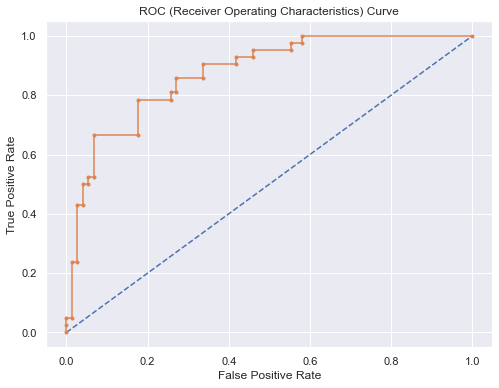

In [37]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = lr.predict_proba(xtest)                  # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_lr = roc_auc_score(ytest, probs)             # calculate AUC
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(ytest, probs)   # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

### Now we will check the Precision Recall curve

f1=0.694 auc_pr=0.781 ap=0.786


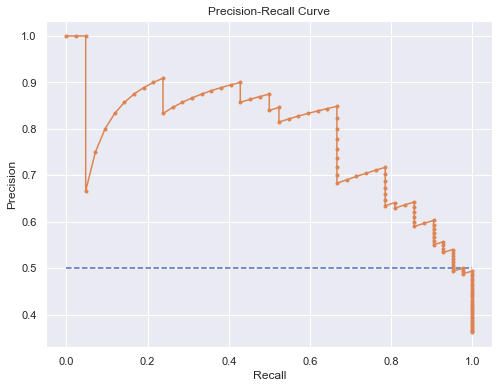

In [38]:
# Precision Recall Curve 

pred_ytest = lr.predict(xtest)                                        # predict class values
precision, recall, thresholds = precision_recall_curve(ytest, probs)  # calculate precision-recall curve
f1 = f1_score(ytest, pred_ytest)                                      # calculate F1 score
auc_lr_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(ytest, probs)                            # calculate average precision score
print("f1=%.3f auc_pr=%.3f ap=%.3f" % (f1, auc_lr_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

#### Adding the values in the dataset prepared above for comparison

In [39]:
models.append('LR')
model_accuracy.append(accuracy_score(ytest, pred_ytest))
model_f1.append(f1)
model_auc.append(auc_lr)

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state = 0)

In [41]:
DTC.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=0)

In [42]:
DTC.score(xtrain,ytrain)    #accuracy score on training data

1.0

In [43]:
DTC.score(xtest,ytest)     #accuracy on test data

0.7241379310344828

#### Now we will use GridSearchCv to optimise the performance of Decision Tree

In [44]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [45]:
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,None]}

In [46]:
GridDTC = GridSearchCV(DTC, param_grid = parameters, cv=5, verbose=0)
GridDTC.fit(x, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]})

In [47]:
print('Best Parameters : ',GridDTC.best_params_)
print('Best Accuracy Score : ',GridDTC.best_score_)

Best Parameters :  {'max_depth': 5}
Best Accuracy Score :  0.7421950598421188


In [48]:
BestDTC = DecisionTreeClassifier(max_depth=5)

In [49]:
BestDTC.fit(xtrain,ytrain)
print("Accuracy Score for Training Dataset : ",BestDTC.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",BestDTC.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.799079754601227
Accuracy Score for test Dataset :  0.7327586206896551


### Now we will plot the ROC curve

AUC: 0.793


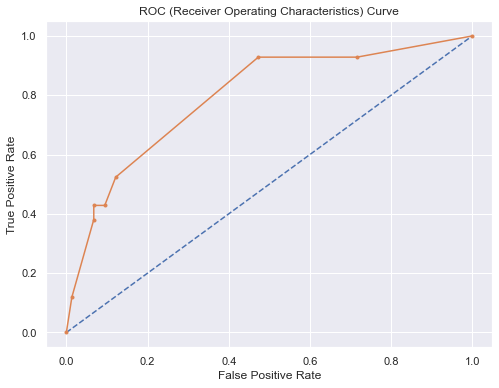

In [50]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = BestDTC.predict_proba(xtest)                 # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_dt = roc_auc_score(ytest, probs)             # calculate AUC
print('AUC: %.3f' %auc_dt)
fpr, tpr, thresholds = roc_curve(ytest, probs)   # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

### Now we will plot the precision Curve

f1=0.537 auc_pr=0.701 ap=0.643


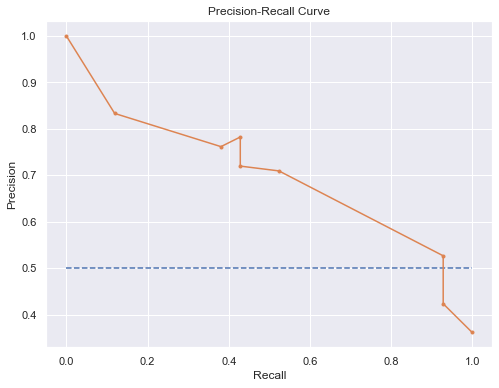

In [51]:

# Precision Recall Curve 

pred_ytest = BestDTC.predict(xtest)                                   # predict class values
precision, recall, thresholds = precision_recall_curve(ytest, probs)  # calculate precision-recall curve
f1 = f1_score(ytest, pred_ytest)                                      # calculate F1 score
auc_dt_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(ytest, probs)                            # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

#### Now we will append the data in the dataset created for comparison of performance

In [52]:
models.append('Decision Tree')
model_accuracy.append(accuracy_score(ytest, pred_ytest))
model_f1.append(f1)
model_auc.append(auc_dt)

## Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state = 0)

In [54]:
RFC.fit(xtrain,ytrain)

RandomForestClassifier(random_state=0)

In [55]:
RFC.score(xtrain,ytrain)      #accuracy Score for training dataset

1.0

In [56]:
RFC.score(xtest,ytest)        #accuracy score for test dataset

0.7844827586206896

#### Now we will use the GridSearchCV to maximise the performance of Random Forest Classifier

In [57]:
parameters = {
    'n_estimators': [5,10,25,50,100,150,200,250],
    'max_depth': [None,1,3,5,7,10,15,20],
    'min_samples_leaf': [1,3,5]
}

In [58]:
GridRFC = GridSearchCV(estimator=RFC, param_grid=parameters, cv=5, verbose=0)
GridRFC.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 1, 3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [5, 10, 25, 50, 100, 150, 200, 250]})

In [59]:
print('Best Parameters : ',GridRFC.best_params_)
print('Best Accuracy Score : ',GridRFC.best_score_)

Best Parameters :  {'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 25}
Best Accuracy Score :  0.7617010440539852


In [60]:
BestRFC = RandomForestClassifier(max_depth=7, min_samples_leaf=1, n_estimators=25)

In [61]:
BestRFC.fit(xtrain,ytrain)
print("Accuracy Score for Training Dataset : ",BestRFC.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",BestRFC.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.8358895705521472
Accuracy Score for test Dataset :  0.7931034482758621


### Plotting The ROC curve

AUC: 0.860


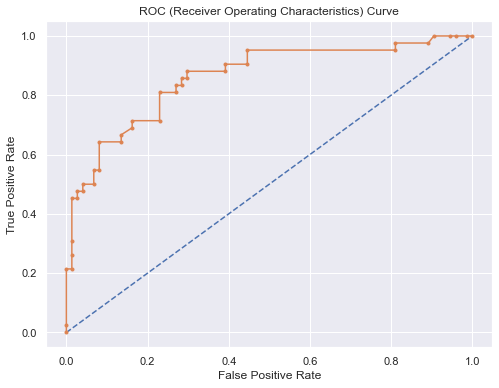

In [62]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = BestRFC.predict_proba(xtest)                 # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_dt = roc_auc_score(ytest, probs)             # calculate AUC
print('AUC: %.3f' %auc_dt)
fpr, tpr, thresholds = roc_curve(ytest, probs)   # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

### Plotting the Precision Recall Curve

f1=0.636 auc_pr=0.810 ap=0.812


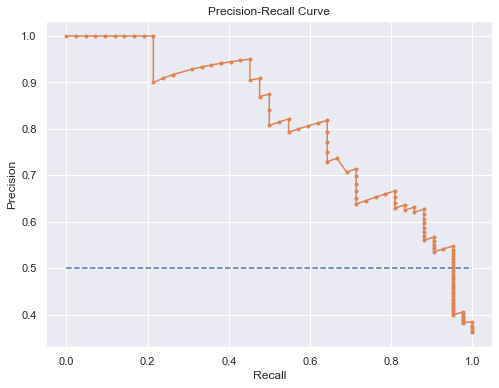

In [63]:
# Precision Recall Curve 

pred_ytest = BestRFC.predict(xtest)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(ytest, probs) # calculate precision-recall curve
f1 = f1_score(ytest, pred_ytest)                                    # calculate F1 score
auc_rf_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(ytest, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [64]:
models.append('Random Forest')
model_accuracy.append(accuracy_score(ytest, pred_ytest))
model_f1.append(f1)
model_auc.append(auc_dt)

## Support Vector Machine

In [65]:
from sklearn.svm import SVC  
SVM = SVC(kernel = 'rbf')

In [66]:
SVM.fit(xtrain,ytrain)

SVC()

In [67]:
print("Accuracy Score for Training Dataset : ",SVM.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",SVM.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.8067484662576687
Accuracy Score for test Dataset :  0.7844827586206896


### Now we will optimise the performance using GridSearchCV

In [68]:
parameters = {
    'C':[1, 5, 10, 15, 20, 25,30,35,40,45,50,55,60,65],
    'gamma':[0.001, 0.005, 0.0001, 0.00001,0.000001]
}

In [69]:
GridSVM = GridSearchCV(estimator=SVM,param_grid=parameters,cv = 5,verbose=0)
GridSVM.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60,
                               65],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05, 1e-06]})

In [70]:
print('Best Parameters : ',GridSVM.best_params_)
print('Best Accuracy Score : ',GridSVM.best_score_)

Best Parameters :  {'C': 5, 'gamma': 0.005}
Best Accuracy Score :  0.7655971479500892


In [71]:
BestSVM = SVC(kernel='rbf', C=5, gamma=0.005, probability=True)

In [72]:
BestSVM.fit(xtrain,ytrain)
print("Accuracy Score for Training Dataset : ",BestSVM.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",BestSVM.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.7561349693251533
Accuracy Score for test Dataset :  0.7586206896551724


### Plotting the ROC curve

AUC: 0.873


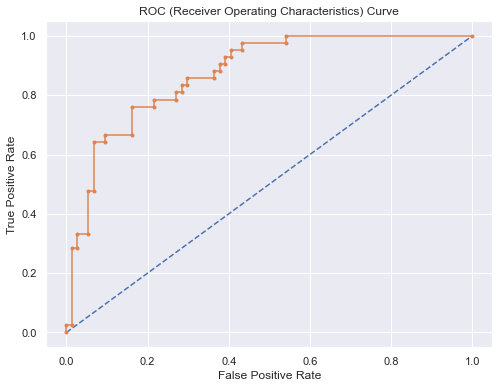

In [73]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = BestSVM.predict_proba(xtest)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_svm = roc_auc_score(ytest, probs)           # calculate AUC
print('AUC: %.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(ytest, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

### Plotting the Precision Recall

f1=0.562 auc_pr=0.762 ap=0.769


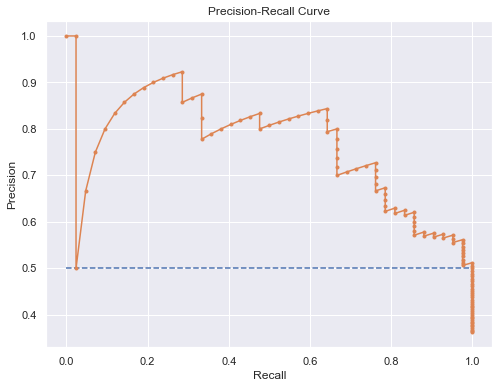

In [74]:
# Precision Recall Curve 

pred_ytest = BestSVM.predict(xtest)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(ytest, probs) # calculate precision-recall curve
f1 = f1_score(ytest, pred_ytest)                                    # calculate F1 score
auc_svm_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(ytest, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [75]:
models.append('SVM')
model_accuracy.append(accuracy_score(ytest, pred_ytest))
model_f1.append(f1)
model_auc.append(auc_svm)

## KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [77]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [78]:
print("Accuracy Score for Training Dataset : ",KNN.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",KNN.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.8404907975460123
Accuracy Score for test Dataset :  0.7413793103448276


### Now we will optimise it using the GridsearchCV

In [79]:
knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}

In [80]:
GridKNN = GridSearchCV(estimator=KNN,param_grid=parameters,cv = 5,verbose=0)
GridKNN.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [81]:
print('Best Parameters : ',GridKNN.best_params_)
print('Best Accuracy Score : ',GridKNN.best_score_)

Best Parameters :  {'n_neighbors': 9}
Best Accuracy Score :  0.7422120363296834


In [82]:
BestKNN = KNeighborsClassifier(n_neighbors=9)

In [83]:
BestKNN.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [84]:
print("Accuracy Score for Training Dataset : ",BestKNN.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",BestKNN.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.7760736196319018
Accuracy Score for test Dataset :  0.7413793103448276


## Plotting the ROC curve

AUC: 0.812


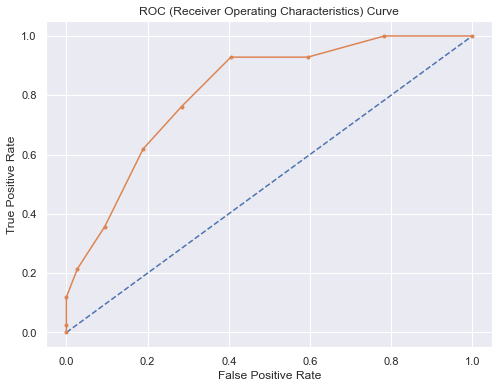

In [85]:

# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = BestKNN.predict_proba(xtest)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_knn = roc_auc_score(ytest, probs)           # calculate AUC
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(ytest, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

## Plotting the Precision Recall

f1=0.634 auc_pr=0.706 ap=0.675


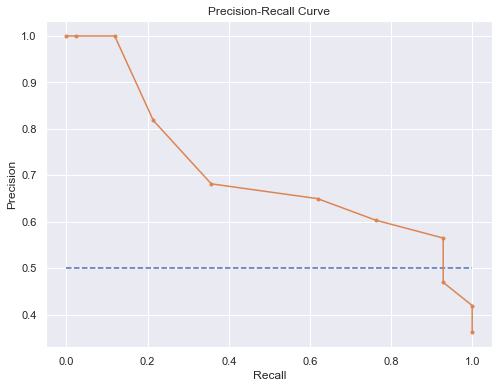

In [86]:
# Precision Recall Curve 

pred_ytest = BestKNN.predict(xtest)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(ytest, probs) # calculate precision-recall curve
f1 = f1_score(ytest, pred_ytest)                                    # calculate F1 score
auc_knn_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(ytest, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

### Adding the result in the dataset

In [87]:
models.append('KNN')
model_accuracy.append(accuracy_score(ytest, pred_ytest))
model_f1.append(f1)
model_auc.append(auc_knn)

## Now we will check the best performing Model

In [88]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

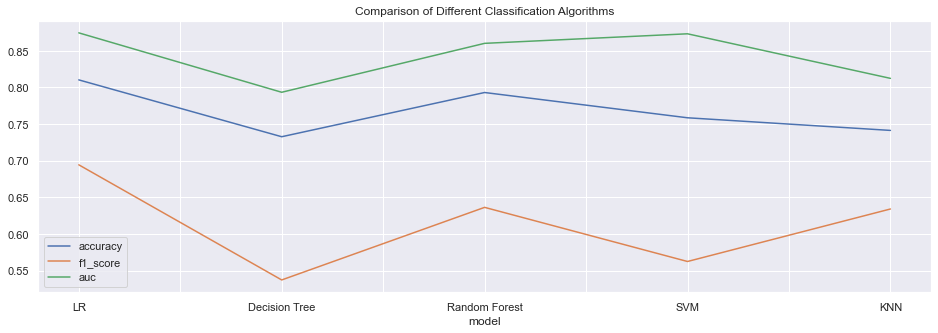

In [89]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms");

In [90]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.810345,0.694444,0.874517
Decision Tree,0.732759,0.537313,0.793436
Random Forest,0.793103,0.636364,0.860199
SVM,0.758621,0.562500,0.873230
KNN,0.741379,0.634146,0.812420


### We can clearly see, the Logistic Regression has the best results when compared to any other model

# Classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.



### We will be using the Logistic Regression as our final model as its accuravy and precision is the highest as we can see from the above table

#### First we will print the Classification report

In [91]:
classification = classification_report(ytest,lr.predict(xtest))
print(classification)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        74
           1       0.83      0.60      0.69        42

    accuracy                           0.81       116
   macro avg       0.82      0.76      0.78       116
weighted avg       0.81      0.81      0.80       116



#### Now we will print he confusion matrix to understand the precision

In [92]:
conf = confusion_matrix(ytest,lr.predict(xtest))
conf

array([[69,  5],
       [17, 25]])

In [93]:
TrueP = conf[1,1]    #True Positive
TrueN = conf[0,0]    #True Negative
FalseP = conf[0,1]   #False Positive
FalseN = conf[1,0]   #False Negative

In [94]:
print('True Positve : ',TrueP)
print('True Negative : ',TrueN)
print('False Positive : ',FalseP)
print('False Negative : ',FalseN)

True Positve :  25
True Negative :  69
False Positive :  5
False Negative :  17


### Issue of False Positive
- There might be some cases, where the person might be negative but the model might have predicted it as positive. Such cases will be **False Positive** and we need to handle them.We will find the ***Precision*** which will tell us the percentage of True Positive.    
                                True Positive/(TruePositive+FalsePositive)
- The ***Sensitivity*** will help us address the issue of **False Negative**. There might be some cases where the model predicted negative but it was supposed to be Positive. To handle it, we will find the Sensitivity which tells us the percentage of the prediction which were correctly identified as Positive.
                                TruePositive/(TruePositive+FalseNegative)
- The ***Specificity*** will help us address the issue of **False Positive**. In other words, its knows as the True Negative Rate. There might be some cases where result was supposed to be negative but the model predicted it to be positive. Specificity helps us to handle/calculate it.
                                TrueNegative/(TrueNegative+FalsePositive)

##### Now we will set the values for Accuracy,Precision, Sensitivity and Specifity

In [95]:
Accuracy = (TrueP+TrueN)/(TrueP+TrueN+FalseP+FalseN)
Precision = TrueP/(TrueP+FalseP)
Sensitivity = TrueP/(TrueP+FalseN)                     # also called recall
Specificity = TrueN/(TrueN+FalseP)

In [96]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%auc_lr)

Accuracy: 0.810
Precision: 0.833
Sensitivity: 0.595
Specificity: 0.932
AUC: 0.875


# Link For tableau Dashboard

https://public.tableau.com/views/CapstoneProject-HealthcaredatabyNIDDK/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link